<a href="https://colab.research.google.com/github/alsrn36533/pdm02/blob/main/project/dogsNcats/dogsNcats_DL2_tf_dataset_Daug.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# dogsNcats
- ## tensorflow dataset

In [1]:
# Down PetImages.zip from Google drive
!gdown https://drive.google.com/uc?id=1VEs5Hz2iThTqP_mRoxQgl8PrZVjwszod

Downloading...
From: https://drive.google.com/uc?id=1VEs5Hz2iThTqP_mRoxQgl8PrZVjwszod
To: /content/PetImages.zip
100% 70.4M/70.4M [00:00<00:00, 251MB/s]


In [2]:
!unzip PetImages.zip -d PetImages
# !unzip -q PetImages.zip -d PetImages

Archive:  PetImages.zip
   creating: PetImages/test/
   creating: PetImages/test/cat/
  inflating: PetImages/test/cat/9909.jpg  
  inflating: PetImages/test/cat/991.jpg  
  inflating: PetImages/test/cat/9910.jpg  
  inflating: PetImages/test/cat/9911.jpg  
  inflating: PetImages/test/cat/9912.jpg  
  inflating: PetImages/test/cat/9913.jpg  
  inflating: PetImages/test/cat/9914.jpg  
  inflating: PetImages/test/cat/9915.jpg  
  inflating: PetImages/test/cat/9916.jpg  
  inflating: PetImages/test/cat/9917.jpg  
  inflating: PetImages/test/cat/9918.jpg  
  inflating: PetImages/test/cat/9919.jpg  
  inflating: PetImages/test/cat/992.jpg  
  inflating: PetImages/test/cat/9920.jpg  
  inflating: PetImages/test/cat/9921.jpg  
  inflating: PetImages/test/cat/9922.jpg  
  inflating: PetImages/test/cat/9923.jpg  
  inflating: PetImages/test/cat/9924.jpg  
  inflating: PetImages/test/cat/9925.jpg  
  inflating: PetImages/test/cat/9926.jpg  
  inflating: PetImages/test/cat/9927.jpg  
  inflating: 

In [3]:
import os
path = 'PetImages'
# 서브 디렉토리별 파일 개수 출력
for root, subdirs, files in os.walk(path):
    if len(files) > 0:
        print(root, len(files))

PetImages 1
PetImages/train 1
PetImages/train/cat 1000
PetImages/train/dog 1000
PetImages/test/cat 100
PetImages/test/dog 100


In [4]:
# import
import matplotlib.pyplot as plt 
from matplotlib.image import imread
# import tensorflow as tf
import tensorflow
from tensorflow import keras
from keras import models, layers


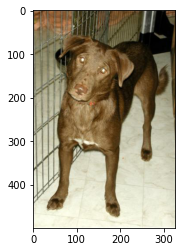

In [5]:
# sample image
image = imread('PetImages/train/dog/1.jpg')
image.shape
plt.imshow(image)
plt.show()

Image shape: (375, 500, 3)


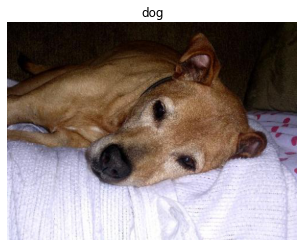

In [10]:
# View a random image
train_dir = './PetImages/train'
test_dir = './PetImages/test'
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+'/'+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img, cmap = "gray")
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

img = view_random_image(target_dir = train_dir, target_class = "dog")
# img = tensorflow.constant(img)
plt.show()


## tensorflow dataset from local images

In [11]:
#
# Setting up the data
#
from tensorflow.keras.preprocessing import image_dataset_from_directory
IMG_SIZE = (128, 128)
batchSize=20

print("Training Images:")
train_data = image_dataset_from_directory(directory = train_dir,
                                            image_size = IMG_SIZE,
                                            label_mode = "binary",
                                            color_mode = "rgb",
                                            batch_size = batchSize)

print("Testing Images:")
test_data = image_dataset_from_directory(directory = test_dir,
                                            image_size = IMG_SIZE,
                                            label_mode = "binary",
                                            color_mode = "rgb",
                                            batch_size = batchSize)

# Inspecting the train_data
train_data   # BatchDataset
# <BatchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), 
# TensorSpec(shape=(None, 1), dtype=tf.float32, name=None))>


Training Images:
Found 2000 files belonging to 2 classes.
Testing Images:
Found 200 files belonging to 2 classes.


<BatchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 1), dtype=tf.float32, name=None))>

## Visualize images from dataset

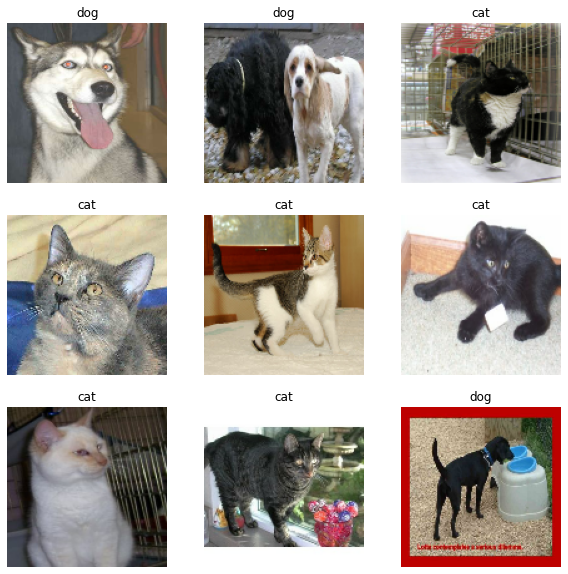

==================== Test dataset ====================


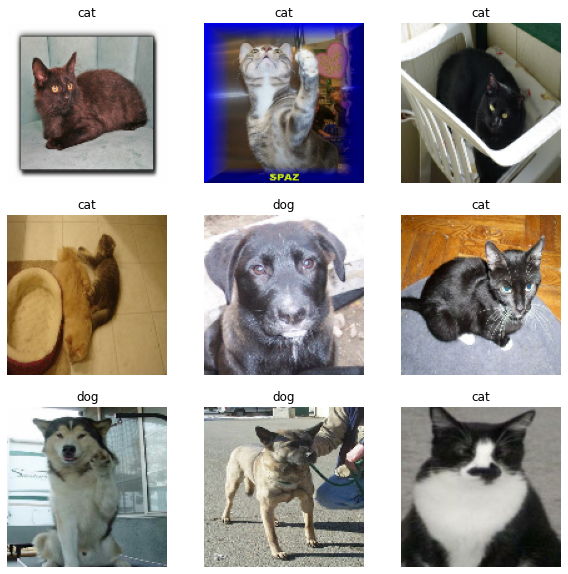

In [14]:
# Plot images from dataset
# figure 크기를 조절합니다.
plt.figure(figsize=(10, 10))
names = ['cat','dog']
# 배치 하나를 가져옵니다.
for images, labels in train_data.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(names[int(labels[i])])
        plt.axis("off")
plt.show()

# [DIY] Plot images from test dataset
print("="*20, 'Test dataset', "="*20)
plt.figure(figsize=(10, 10))
# 배치 하나를 가져옵니다.
for images, labels in test_data.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(names[int(labels[i])])
        plt.axis("off")
plt.show()

## Data Augmentation

In [21]:
#
# Data augmentation
#
# Create a data augmentation stage with horizontal flipping, rotations, zooms
#
tensorflow.get_logger().setLevel('ERROR')  # Clear warnings in data augmentation

# from tensorflow import keras
data_augmentation = keras.Sequential([
  layers.RandomFlip("horizontal"),
  layers.RandomRotation(0.2),
  layers.RandomZoom(0.2),
  # layers.RandomHeight(0.1),  # Not compatible with model
  # layers.RandomWidth(0.1),
  # layers.Rescaling(1./255) # keep for ResNet50V2, remove for EfficientNetB0
], name ="data_augmentation")

# Check the below link
# https://stackoverflow.com/questions/72927645/the-last-dimension-of-the-inputs-to-a-dense-layer-should-be-defined-found-none

### Visualize the augmented images

========================= Train dataset =========================
tf.Tensor(
[[0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]], shape=(20, 1), dtype=float32) (20, 128, 128, 3)
(1, 128, 128, 3)
(1, 128, 128, 3)
(1, 128, 128, 3)
(1, 128, 128, 3)
(1, 128, 128, 3)
(1, 128, 128, 3)
(1, 128, 128, 3)
(1, 128, 128, 3)
(1, 128, 128, 3)


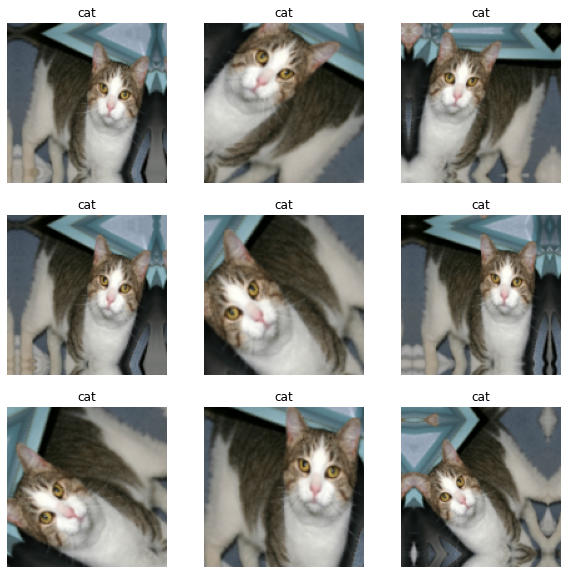

========================= Test dataset =========================
tf.Tensor(
[[1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]], shape=(20, 1), dtype=float32) (20, 128, 128, 3)
(1, 128, 128, 3)
(1, 128, 128, 3)
(1, 128, 128, 3)
(1, 128, 128, 3)
(1, 128, 128, 3)
(1, 128, 128, 3)
(1, 128, 128, 3)
(1, 128, 128, 3)
(1, 128, 128, 3)


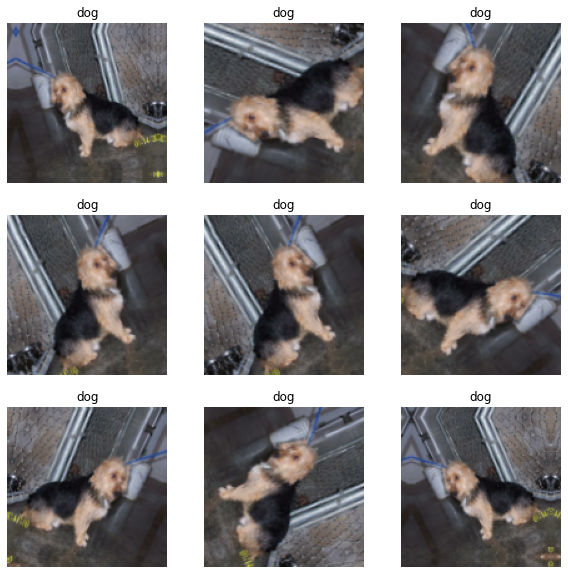

In [22]:
#
# Visualize the augmented images
#
print("="*25, 'Train dataset', "="*25)
plt.figure(figsize=(10,10))
image_idx = 0
for images, labels in train_data.take(1):    # Make a batch of images & labels
    print(labels,images.shape)
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        aug_img = data_augmentation(tensorflow.expand_dims(images[image_idx], axis=0))
        print(aug_img.shape)
        plt.imshow(aug_img[0].numpy().astype("uint8"))
        plt.title("{}".format(names[int(labels[image_idx])]))
        plt.axis("off")
    break
plt.show()

print("="*25, 'Test dataset', "="*25)
plt.figure(figsize=(10,10))
image_idx = 0
for images, labels in test_data.take(1):    # Make a batch of images & labels
    print(labels,images.shape)
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        aug_img = data_augmentation(tensorflow.expand_dims(images[image_idx], axis=0))
        print(aug_img.shape)
        plt.imshow(aug_img[0].numpy().astype("uint8"))
        plt.title("{}".format(names[int(labels[image_idx])]))
        plt.axis("off")
    break
plt.show()

## Model : CNN + FCN

In [23]:
#
# Sequential model with data augmentation
# 
model = tensorflow.keras.Sequential([
  layers.Input(shape=(128,128,3), name='input_layer'),
  data_augmentation,
  layers.Conv2D(32,3,activation='relu'),
  layers.MaxPool2D(pool_size=2),
  layers.Conv2D(64,3,activation='relu'),
  layers.MaxPool2D(pool_size=2),
  layers.Flatten(),
  layers.Dense(512, activation='relu'), 
  layers.Dense(1, activation='sigmoid')  # Remove RandomHeight and RandomWidth fro dataAugmentation
])

model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001), 
              loss = 'binary_crossentropy', 
              metrics = ['accuracy'])

model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 data_augmentation (Sequenti  (None, 128, 128, 3)      0         
 al)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 63, 63, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                      

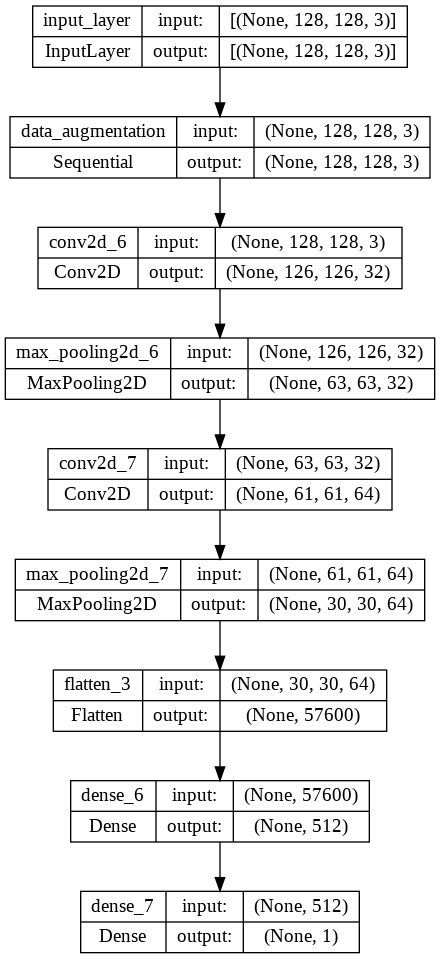

In [24]:
# from tensorflow import keras
keras.utils.plot_model(model, show_shapes=True)

In [25]:
len(train_data),len(test_data)  # 2000/20, 200/20, batch_size=20

(100, 10)

# Building the Model

In [26]:
# Setting up the callbacks
# Setup EarlyStopping callback to stop training if model's val_loss doesn't improve for 3 epochs
early_stopping = keras.callbacks.EarlyStopping(monitor="val_loss", # watch the val loss metric
                                                  patience=10) # if val loss decreases for 10 epochs in a row, stop training
# Creating learning rate reduction callback
reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor="val_loss",  
                                                 factor=0.25, # multiply the learning rate by 0.2 (reduce by 4x)
                                                 patience=5,
                                                 verbose=1, # print out when learning rate goes down 
                                                 min_lr=1e-7)

## Check the summary
for no, layer in enumerate(model.layers):
  print(no, layer.trainable)


0 True
1 True
2 True
3 True
4 True
5 True
6 True
7 True


In [27]:
######################################################
# Training model using augmentated data
######################################################
#
%%time
history = model.fit(train_data, 
                    epochs=100, 
                    steps_per_epoch = len(train_data), 
                    validation_data = test_data,
                    validation_steps = len(test_data), # batchSize,
                    callbacks = [early_stopping, reduce_lr])


Epoch 1/100
100/100 [==============================] - 13s 43ms/step - loss: 26.6460 - accuracy: 0.5350 - val_loss: 6.7841 - val_accuracy: 0.5300 - lr: 1.0000e-04
Epoch 2/100
100/100 [==============================] - 4s 41ms/step - loss: 2.4196 - accuracy: 0.5785 - val_loss: 1.6784 - val_accuracy: 0.6100 - lr: 1.0000e-04
Epoch 3/100
100/100 [==============================] - 4s 40ms/step - loss: 1.4198 - accuracy: 0.5735 - val_loss: 1.8174 - val_accuracy: 0.5900 - lr: 1.0000e-04
Epoch 4/100
100/100 [==============================] - 4s 41ms/step - loss: 0.9849 - accuracy: 0.6075 - val_loss: 0.9046 - val_accuracy: 0.6550 - lr: 1.0000e-04
Epoch 5/100
100/100 [==============================] - 4s 41ms/step - loss: 0.8308 - accuracy: 0.6000 - val_loss: 0.7883 - val_accuracy: 0.6600 - lr: 1.0000e-04
Epoch 6/100
100/100 [==============================] - 4s 42ms/step - loss: 0.7466 - accuracy: 0.6330 - val_loss: 0.7984 - val_accuracy: 0.6700 - lr: 1.0000e-04
Epoch 7/100
100/100 [===========

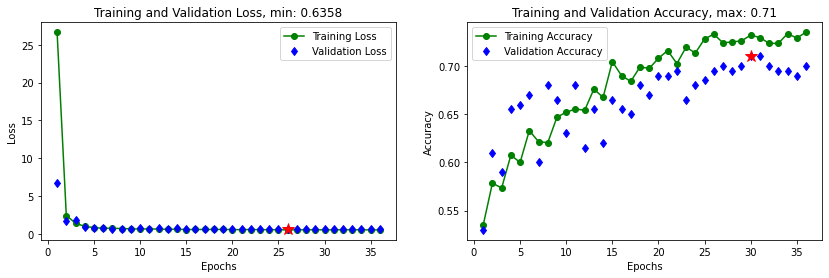

In [28]:
#############################################
# More training graphs
# More graphs of loss and accuracy
# import matplotlib.pyplot as plt
import numpy as np

history_dict = history.history 
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure(figsize=(14, 4))

plt.subplot(1,2,1)
plt.plot(epochs, loss, 'go-', label='Training Loss')
plt.plot(epochs, val_loss, 'bd', label='Validation Loss')
plt.plot(np.argmin(np.array(val_loss))+1,val_loss[np.argmin(np.array(val_loss))], 'r*', ms=12)
plt.title('Training and Validation Loss, min: ' + str(np.round(val_loss[np.argmin(np.array(val_loss))],4)))
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

epochs = range(1, len(loss) + 1)

plt.subplot(1,2,2)
plt.plot(epochs, acc, 'go-', label='Training Accuracy') #, c='blue')
plt.plot(epochs, val_acc, 'bd', label='Validation Accuracy') #, c='red')
plt.plot(np.argmax(np.array(val_acc))+1,val_acc[np.argmax(np.array(val_acc))], 'r*', ms=12)
plt.title('Training and Validation Accuracy, max: ' + str(np.round(val_acc[np.argmax(np.array(val_acc))],4)))
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


## Trained so so ...

---

In [29]:
model.evaluate(test_data)

10/10 [==============================] - 0s 10ms/step - loss: 0.6402 - accuracy: 0.7000


[0.6402185559272766, 0.699999988079071]

In [30]:
pred = model.predict(test_data)

10/10 [==============================] - 0s 8ms/step


In [31]:
pred.shape,pred[:10]

((200, 1), array([[0.3271264 ],
        [0.8392779 ],
        [0.65751845],
        [0.12070218],
        [0.7055313 ],
        [0.15707582],
        [0.2791665 ],
        [0.6308255 ],
        [0.84080523],
        [0.46578372]], dtype=float32))

## CONFUSION MATRIX

In [32]:
# Correct-handling with tf_dataset - test_data,unbatch()
from sklearn.metrics import confusion_matrix

y_test=[]
y_pred=[]
for images, labels in test_data.unbatch():   # 개개의 이미지에 대한 예측과 label에 수집
    # print(images.shape,labels.shape)
    y_pred0 = model.predict(np.expand_dims(images, axis=0), verbose=0) #, batch_size=1)  
    y_pred.append(np.round(y_pred0[0]))  #, axis=0)
    y_test.append(labels.numpy())
    # break

print(len(y_test),len(y_pred))
# print(y_test.shape,y_pred.shape)

print("정답=", y_test[0])
print("예측값=", y_pred[0]) #, np.round(y_pred0[0]))

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

confusion_matrix(y_test, y_pred)

200 200
정답= [1.]
예측값= [1.]
0.7


array([[70, 30],
       [30, 70]])

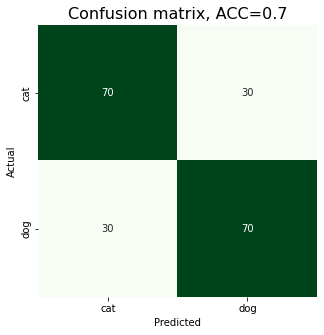

In [33]:
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)

import seaborn as sns
plt.figure(figsize=(5,5))
sns.heatmap(cm, cbar=False, xticklabels=names, yticklabels=names, fmt='d', annot=True, cmap=plt.cm.Greens) #coolwarm)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion matrix, ACC={acc}', fontsize=16)
plt.show()